In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df_NACC = pd.read_csv('./investigator_nacc46.csv')

C:\Users\Debraj Basu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,21,23,25,27,40,43,45,47,50,60,62,64,66,68,70,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,133,164,175,178,216,219,221,223,225,227,229,231,233,235,237,239,241,243,245,249,251,253,255,257,259,261,263,265,267,269,271,381,396,398,400,420,422,431,444,453,493,566,574,599,635,651,668,671,676,688,699,705,707,774,785,787,789,791,797,858,913,914,915,923,924,925,926,936,958,961,964) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
cols2FAQ =['BILLS', 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS','PAYATTN', 'REMDATES', 'TRAVEL']
col2NPIQ = ['DELSEV', 'HALLSEV', 'AGITSEV', 'DEPDSEV', 'ANXSEV', 'ELATSEV', 'APASEV', 'DISNSEV', \
         'IRRSEV', 'MOTSEV', 'NITESEV', 'APPSEV']

# Use the columns of interests for temporal understanding of score changes

In [4]:
df_score = df_NACC[(df_NACC['NACCMMSE']<=30)  & (df_NACC['NACCMMSE'] >=0) & (df_NACC['NACCAGEB'] >45) &\
             (df_NACC['MARISTAT'] !=9) &(df_NACC['NACCLIVS'] !=9) & (df_NACC['NACCUDSD'] !=2) & (df_NACC['NACCGDS'] !=-4) \
            &  (df_NACC['NACCGDS'] <=15) & (df_NACC['BILLS'] >=0)& (df_NACC['BILLS'] <=8) & (df_NACC['TAXES'] >=0)& \
            (df_NACC['TAXES'] <=8) & (df_NACC['SHOPPING'] >=0)& (df_NACC['SHOPPING'] <=8) & (df_NACC['GAMES'] >=0)& \
            (df_NACC['GAMES'] <=8) & (df_NACC['STOVE'] >=0)& (df_NACC['STOVE'] <=8) & (df_NACC['MEALPREP'] >=0)& \
            (df_NACC['MEALPREP'] <=8) & (df_NACC['EVENTS'] >=0)& (df_NACC['EVENTS'] <=8) & (df_NACC['PAYATTN'] >=0)&\
            (df_NACC['PAYATTN'] <=8) & (df_NACC['REMDATES'] >=0)& (df_NACC['REMDATES'] <=8) & (df_NACC['TRAVEL'] >=0)& \
            (df_NACC['TRAVEL'] <=8) & (df_NACC['DELSEV'] >=1)& (df_NACC['DELSEV'] <=8) &(df_NACC['HALLSEV'] >=1)&\
            (df_NACC['HALLSEV'] <=8) &(df_NACC['AGITSEV'] >=1)& (df_NACC['AGITSEV'] <=8) &(df_NACC['DEPDSEV'] >=1)\
            & (df_NACC['DEPDSEV'] <=8) &(df_NACC['ANXSEV'] >=1)& (df_NACC['ANXSEV'] <=8) &(df_NACC['ELATSEV'] >=1)& \
            (df_NACC['ELATSEV'] <=8) &(df_NACC['APASEV'] >=1)& (df_NACC['APASEV'] <=8) &(df_NACC['DISNSEV'] >=1)& \
            (df_NACC['DISNSEV'] <=8) & (df_NACC['IRRSEV'] >=1)& (df_NACC['IRRSEV'] <=8) &(df_NACC['MOTSEV'] >=1)& \
            (df_NACC['MOTSEV'] <=8) & (df_NACC['NITESEV'] >=1)& (df_NACC['NITESEV'] <=8) &(df_NACC['APPSEV'] >=1)& \
            (df_NACC['APPSEV'] <=8)]\
         [['NACCID', 'VISITMO','VISITYR', 'NACCVNUM', 'NACCAVST','CDRSUM', 'NACCMMSE','BILLS', 'TAXES', 'SHOPPING', 'GAMES', \
           'STOVE', 'MEALPREP', 'EVENTS','PAYATTN', 'REMDATES', 'TRAVEL', 'DELSEV', 'HALLSEV', 'AGITSEV', 'DEPDSEV', \
           'ANXSEV', 'ELATSEV', 'APASEV', 'DISNSEV', 'IRRSEV', 'MOTSEV', 'NITESEV', 'APPSEV',\
           'NACCGDS', 'DEMENTED', 'NACCUDSD']]
df_score =df_score.reset_index(drop= True)

# convert all values in NPI-Q from 8 to 0

In [5]:
def assignvalue(value):
    if value ==8:
        return 0
    else:
        return value
list_item =['DELSEV', 'HALLSEV', 'AGITSEV', 'DEPDSEV', 'ANXSEV', 'ELATSEV', 'APASEV', 'DISNSEV', 'IRRSEV', 'MOTSEV', \
            'NITESEV', 'APPSEV']
for l in list_item:
    df_score[l]=df_score[l].apply(assignvalue )

# Add the NPI scores and drop the individual categories

In [6]:
df_score['NPI_SUM'] = df_score[col2NPIQ].sum(axis =1)
df_score= df_score.drop(col2NPIQ, axis =1)
df_score.shape
df_score.head()

,NACCID,VISITMO,VISITYR,NACCVNUM,NACCAVST,CDRSUM,NACCMMSE,BILLS,TAXES,SHOPPING,...,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,NACCGDS,DEMENTED,NACCUDSD,NPI_SUM
0,NACC000385,11,2006,1,7,5.0,24,2,2,0,...,0,0,1,2,2,2,1,1,4,1
1,NACC000385,3,2008,2,7,7.0,22,3,3,3,...,0,3,2,1,3,3,2,1,4,0
2,NACC000385,3,2009,3,7,5.0,21,3,3,3,...,1,2,2,2,3,3,1,1,4,0
3,NACC000385,4,2010,4,7,5.0,20,2,2,2,...,0,1,2,2,2,2,1,1,4,4
4,NACC000385,1,2011,5,7,7.0,16,3,3,3,...,0,1,1,2,2,3,3,1,4,2


In [ ]:
df_score.groupby('NACCVNUM').size()

# Add the FAQ scores and drop the individual categories

In [7]:
df_score['FAQ_SUM'] = df_score[cols2FAQ].sum(axis =1)
df_score= df_score.drop(cols2FAQ, axis =1)
df_score.shape

(83664, 12)

# Total number of patients

In [17]:
len(df_score['NACCID'].unique())

28554

# Convert NACCUDSD to categorical values

In [8]:
df_score['NACCUDSD'] = df_score['NACCUDSD'].replace([1,3,4], ['NC','MCI', 'Dementia']) # Target variable

In [10]:
df_score.head()

,NACCID,VISITMO,VISITYR,NACCVNUM,NACCAVST,SEX,MARISTAT,NACCLIVS,NACCAGEB,CDRSUM,...,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,NACCGDS,DEMENTED,NACCUDSD,NPI_SUM
0,NACC000385,11,2006,1,7,1,1,2,80,5.0,...,0,0,1,2,2,2,1,1,Dementia,1
1,NACC000385,3,2008,2,7,1,1,2,80,7.0,...,0,3,2,1,3,3,2,1,Dementia,0
2,NACC000385,3,2009,3,7,1,1,2,80,5.0,...,1,2,2,2,3,3,1,1,Dementia,0
3,NACC000385,4,2010,4,7,1,1,2,80,5.0,...,0,1,2,2,2,2,1,1,Dementia,4
4,NACC000385,1,2011,5,7,1,1,2,80,7.0,...,0,1,1,2,2,3,3,1,Dementia,2


In [9]:
df_filter = df_score.groupby(['NACCID']).filter(lambda x : len(x)==5)

In [51]:
df_filter.shape

(9085, 12)

### Find the patient list with total visits ==5 and dementia status == Normal cognition (NC) althrough the 5 visits

In [10]:
df_filter_NC = df_score[df_score['NACCUDSD'] == 'NC'].groupby(['NACCID']).filter(lambda x : len(x)==5)


### Find the patient list with total visits ==5 and dementia status == MCI althrough the 5 visits

In [11]:
df_filter_MCI = df_score[df_score['NACCUDSD'] == 'MCI'].groupby(['NACCID']).filter(lambda x : len(x)==5)


### Find the patient list with total visits ==5 and dementia status == Dementia althrough the 5 visits

In [12]:
df_filter_Dem = df_score[df_score['NACCUDSD'] == 'Dementia'].groupby(['NACCID']).filter(lambda x : len(x)==5)


In [22]:
df_score.shape

(83664, 12)

### Merge the NC, MCI and Dementia data frames to build one single dataframe

In [13]:
df= pd.concat([df_filter_NC, df_filter_MCI, df_filter_Dem])

In [35]:
df.shape

(8050, 12)

### Filter out the data set that has mixed NC, MCI and dementia

In [14]:
df_mixed = df_filter.merge(df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

In [103]:
df_filter.head()

,NACCID,VISITMO,VISITYR,NACCVNUM,NACCAVST,CDRSUM,NACCMMSE,NACCGDS,DEMENTED,NACCUDSD,NPI_SUM,FAQ_SUM
73,NACC036619,8,2008,1,5,1.5,30,2,0,MCI,3,3
74,NACC036619,8,2009,2,5,1.0,28,1,0,MCI,3,5
75,NACC036619,8,2010,3,5,1.0,29,0,0,MCI,2,1
76,NACC036619,8,2011,4,5,0.0,29,1,0,NC,0,8
77,NACC036619,8,2012,5,5,0.0,30,0,0,NC,0,8


### Use the individual dataframes to build CSV files and run classification models

In [80]:
df_mixed.to_csv('NACC_mixed.csv', sep =',',  encoding='utf-8')
df_filter_NC.to_csv('NACC_NC.csv', sep =',',  encoding='utf-8')
df_filter_MCI.to_csv('NACC_MCI.csv', sep =',',  encoding='utf-8')
df_filter_Dem.to_csv('NACC_Dem.csv', sep =',',  encoding='utf-8')
df_filter.to_csv('NACC_filter.csv', sep =',',  encoding='utf-8')


### Visualization

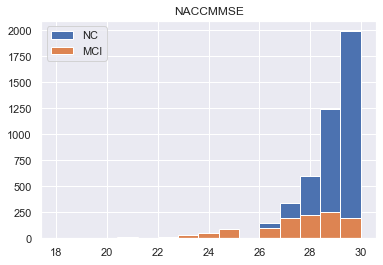

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_filter_NC.hist(column= 'NACCMMSE', ax =ax, bins = 15)
df_filter_MCI.hist(column= 'NACCMMSE', ax =ax, bins =15)
#df_filter_Dem.hist(column= 'NACCMMSE', ax =ax,bins =15)

ax.legend(['NC', 'MCI'])

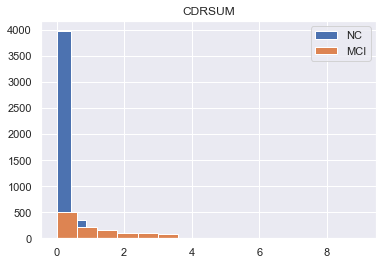

In [16]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
df_filter_NC.hist(column= 'CDRSUM', ax =ax1, bins = 15)
df_filter_MCI.hist(column= 'CDRSUM', ax =ax1, bins =15)
# df_filter_Dem.hist(column= 'CDRSUM', ax =ax1,bins =15)

ax1.legend(['NC', 'MCI'])

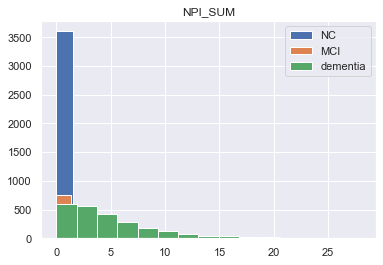

In [105]:
import matplotlib.pyplot as plt
fig, ax2 = plt.subplots()
df_filter_NC.hist(column= 'NPI_SUM', ax =ax2, bins = 15)
df_filter_MCI.hist(column= 'NPI_SUM', ax =ax2, bins =15)
df_filter_Dem.hist(column= 'NPI_SUM', ax =ax2,bins =15)

ax2.legend(['NC', 'MCI', 'dementia'])

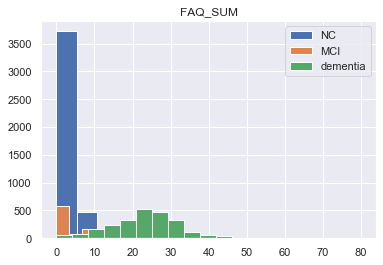

In [106]:
import matplotlib.pyplot as plt
fig, ax3 = plt.subplots()
df_filter_NC.hist(column= 'FAQ_SUM', ax =ax3, bins = 15)
df_filter_MCI.hist(column= 'FAQ_SUM', ax =ax3, bins =15)
df_filter_Dem.hist(column= 'FAQ_SUM', ax =ax3,bins =15)

ax3.legend(['NC', 'MCI', 'dementia'])